<h1>Wave Field Reconstruction Exploration with microSWIFTS</h1>
Written By: EJ Rainville, Fall 2021

In [40]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import signal
import sys

# Import DUNEX Tools
sys.path.insert(1, '../tools/')
import microSWIFTTools
import CoastalEng as ce 
%matplotlib widget


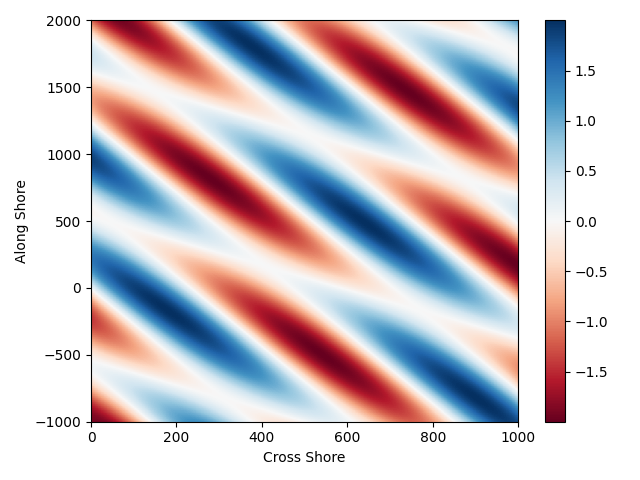

In [71]:
# Make Grid for reconstruction
x = np.linspace(0, 1000, num=1000)
y = np.linspace(-1000, 2000, num=600)
x_grid, y_grid = np.meshgrid(x, y, indexing='xy')

# Approximate depth (open ocean)
depth = 1000 # units are meters

# Make ocean surface function that will be "sampled" at each grid point 
# Long period component - Swell waves
period_1 = 15 # period in seconds 
freq_1 = 1/period_1
component_1 = np.sin((1/(2*np.pi)) * freq_1 * (x_grid + 0.2 * y_grid))

# Middle Component
period_2 = 10 # period in seconds 
freq_2= 1/period_2
component_2 = np.sin((1/(2*np.pi)) * freq_2 * (x_grid + 0.5 * y_grid))

# Total Surface
eta = component_1 + component_2 

# Plot the Ocean Surface function 
fig_surface, ax = plt.subplots()
# Plot surface contour map
map = ax.pcolor(x_grid, y_grid, eta, cmap='RdBu', shading='auto')
ax.set_xlabel('Cross Shore')
ax.set_ylabel('Along Shore')
# ax.axis('equal')
ax.set_xlim(x[0], x[-1])
ax.set_ylim(y[0], y[-1])
fig_surface.colorbar(map, ax=ax)

# Figure Properties
plt.tight_layout()


In [ ]:
# Randomly Seed the wave field with fake drifters
